In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = 'raw_data'
train_df = pd.read_csv(os.path.join(data_path, 'train1_filterd.csv'), sep=',')
test_df = pd.read_csv(os.path.join(data_path, 'test1_filterd.csv'), sep=',')

In [4]:

print("Train DataFrame Info:")
print(train_df.info())
print("\nTest DataFrame Info:")
print(test_df.info())

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         20631 non-null  int64  
 1   cycle                                      20631 non-null  int64  
 2   setting1                                   20631 non-null  float64
 3   setting2                                   20631 non-null  float64
 4   setting3                                   20631 non-null  float64
 5   T24_Total_temperature_at_LPC_outlet_(°R)   20631 non-null  float64
 6   T30_Total_temperature_at_HPC_outlet_(°R)   20631 non-null  float64
 7   T50_Total_temperature_at_LPT_outlet_(°R)   20631 non-null  float64
 8   P30_Total_pressure_at_HPC_outlet_(psia)    20631 non-null  float64
 9   Nf_Physical_fan_speed_(rpm)                20631 non-null  float64
 10  

In [5]:
print("\nTrain DataFrame Head:")
print(train_df.head())
print("\nTest DataFrame Head:")
print(test_df.head())


Train DataFrame Head:
   id  cycle  setting1  setting2  setting3  \
0   1      1   -0.0007   -0.0004     100.0   
1   1      2    0.0019   -0.0003     100.0   
2   1      3   -0.0043    0.0003     100.0   
3   1      4    0.0007    0.0000     100.0   
4   1      5   -0.0019   -0.0002     100.0   

   T24_Total_temperature_at_LPC_outlet_(°R)  \
0                                    641.82   
1                                    642.15   
2                                    642.35   
3                                    642.35   
4                                    642.37   

   T30_Total_temperature_at_HPC_outlet_(°R)  \
0                                   1589.70   
1                                   1591.82   
2                                   1587.99   
3                                   1582.79   
4                                   1582.85   

   T50_Total_temperature_at_LPT_outlet_(°R)  \
0                                   1400.60   
1                                   1403

In [6]:
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())
print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())


Missing values in Train DataFrame:
id                                           0
cycle                                        0
setting1                                     0
setting2                                     0
setting3                                     0
T24_Total_temperature_at_LPC_outlet_(°R)     0
T30_Total_temperature_at_HPC_outlet_(°R)     0
T50_Total_temperature_at_LPT_outlet_(°R)     0
P30_Total_pressure_at_HPC_outlet_(psia)      0
Nf_Physical_fan_speed_(rpm)                  0
Nc_Physical_core_speed_(rpm)                 0
Ps30_Static_pressure_at_HPC_outlet_(psia)    0
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)     0
NRf_Corrected_fan_speed_(rpm)                0
NRc_Corrected_core_speed_(rpm)               0
BPR_Bypass_Ratio                             0
htBleed_Bleed_Enthalpy                       0
W31_HPT_coolant_bleed_(lbm/s)                0
W32_LPT_coolant_bleed_(lbm/s)                0
RUL                                          0
dtype: int64

Missing va

In [7]:
print("\nTrain DataFrame Description:")
print(train_df.describe())
print("\nTest DataFrame Description:")
print(test_df.describe())


Train DataFrame Description:
                 id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

       T24_Total_temperature_at_LPC_outlet_(°R)  \
count                              20631.000000   
mean                                 642.680934   
std                                    0.500053   
min                                  641.210000   
25%                                  64

In [8]:
for column in train_df.columns:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')

print("\nTrain DataFrame Data Types After Conversion:")
print(train_df.dtypes)

print("\nMissing values in Train DataFrame After Conversion:")
print(train_df.isnull().sum())

train_df.dropna(inplace=True)

print("\nTrain DataFrame Info After Dropping NA:")
print(train_df.info())


Train DataFrame Data Types After Conversion:
id                                             int64
cycle                                          int64
setting1                                     float64
setting2                                     float64
setting3                                     float64
T24_Total_temperature_at_LPC_outlet_(°R)     float64
T30_Total_temperature_at_HPC_outlet_(°R)     float64
T50_Total_temperature_at_LPT_outlet_(°R)     float64
P30_Total_pressure_at_HPC_outlet_(psia)      float64
Nf_Physical_fan_speed_(rpm)                  float64
Nc_Physical_core_speed_(rpm)                 float64
Ps30_Static_pressure_at_HPC_outlet_(psia)    float64
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)     float64
NRf_Corrected_fan_speed_(rpm)                float64
NRc_Corrected_core_speed_(rpm)               float64
BPR_Bypass_Ratio                             float64
htBleed_Bleed_Enthalpy                         int64
W31_HPT_coolant_bleed_(lbm/s)                float64


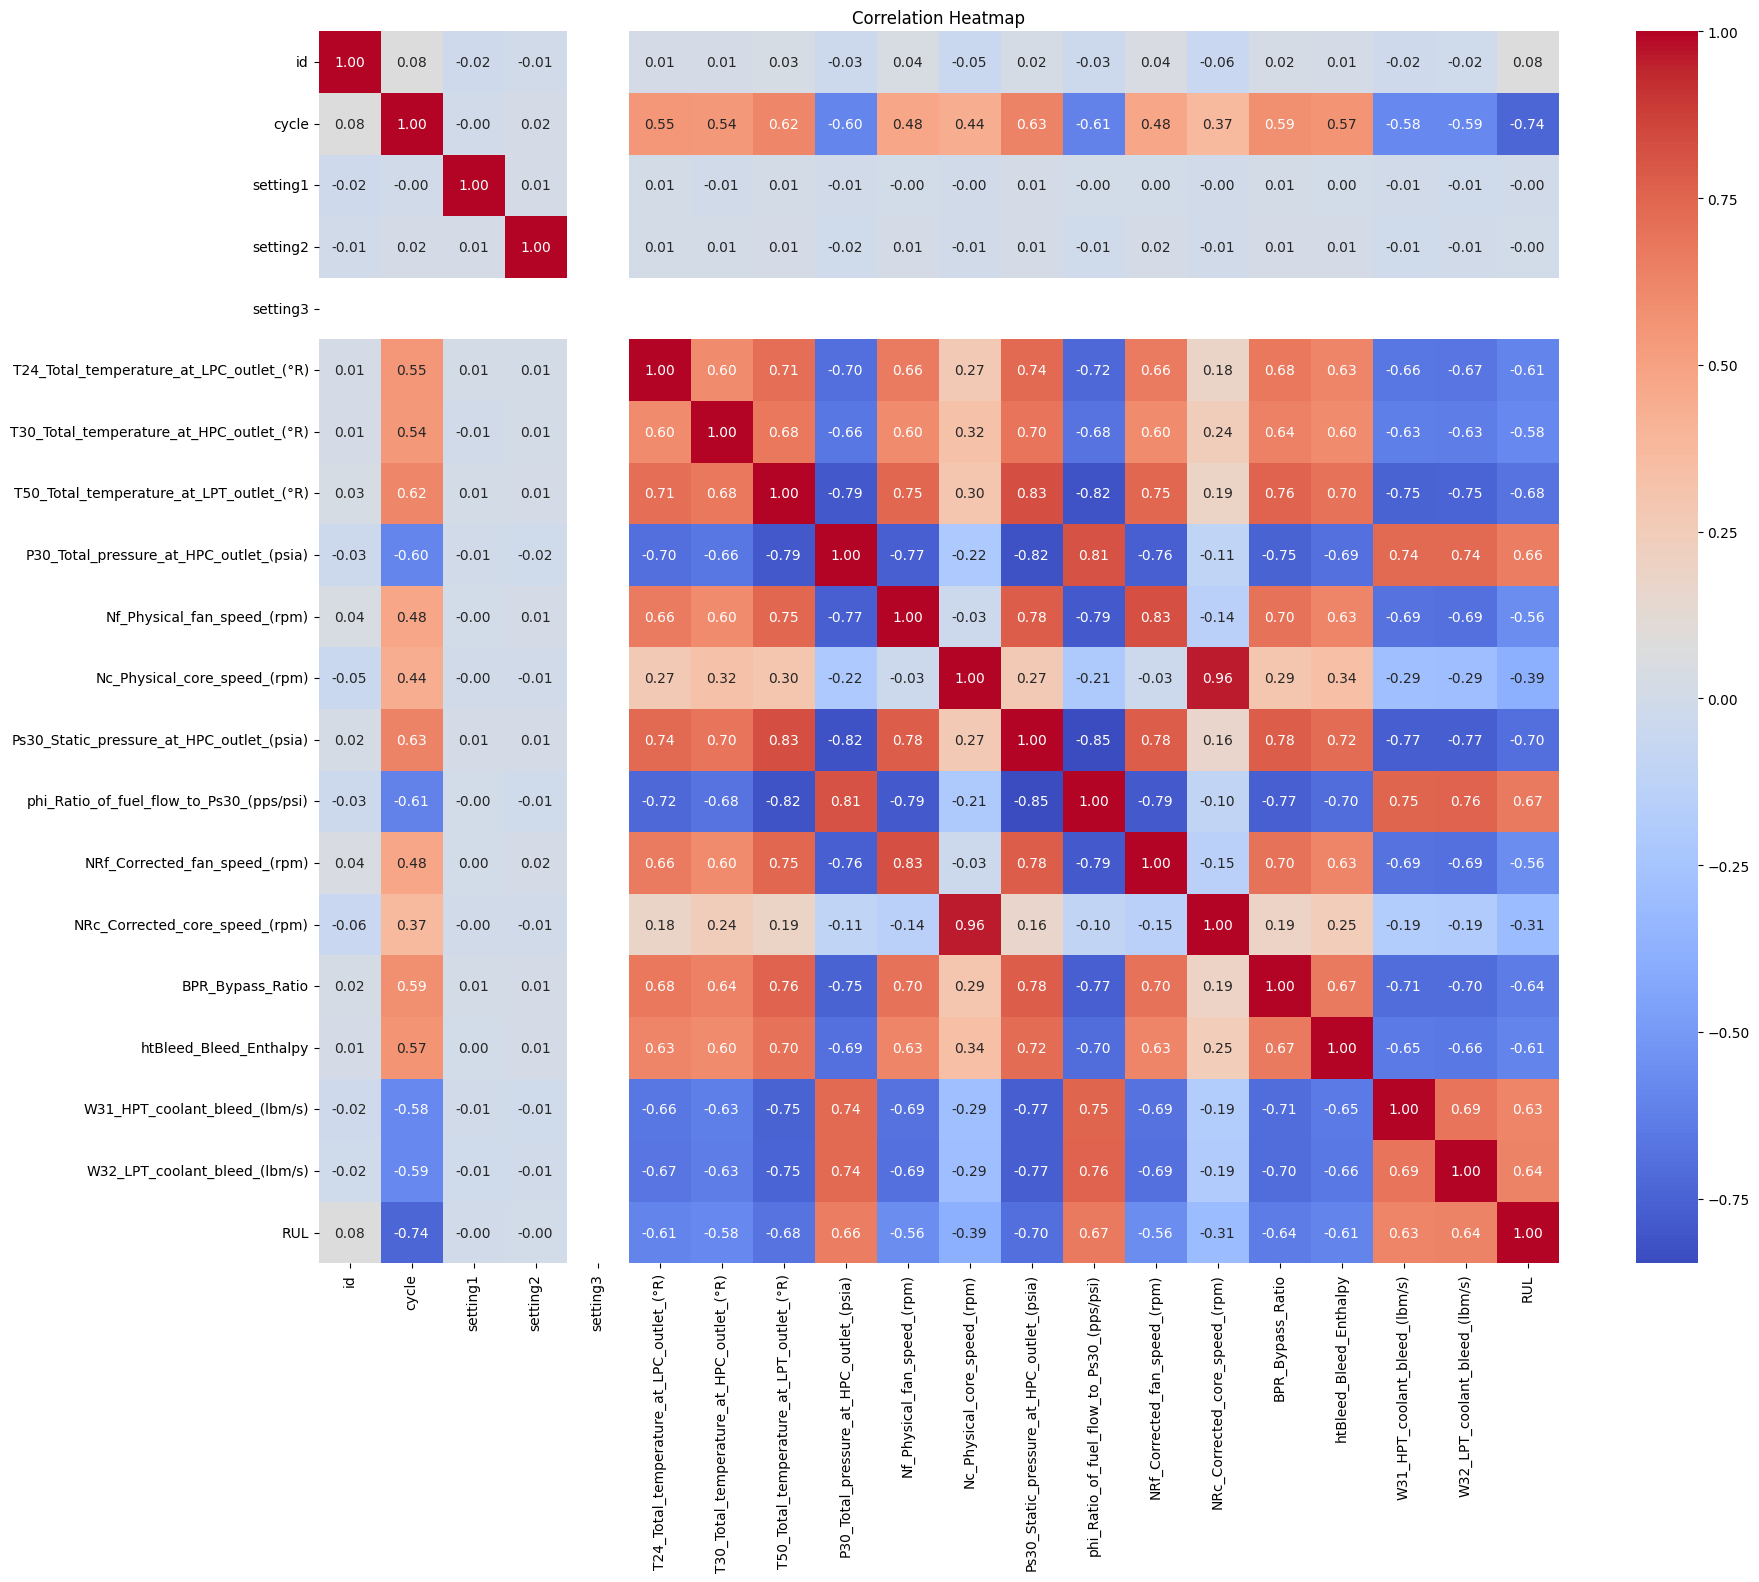

In [9]:
plt.figure(figsize=(20, 16))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

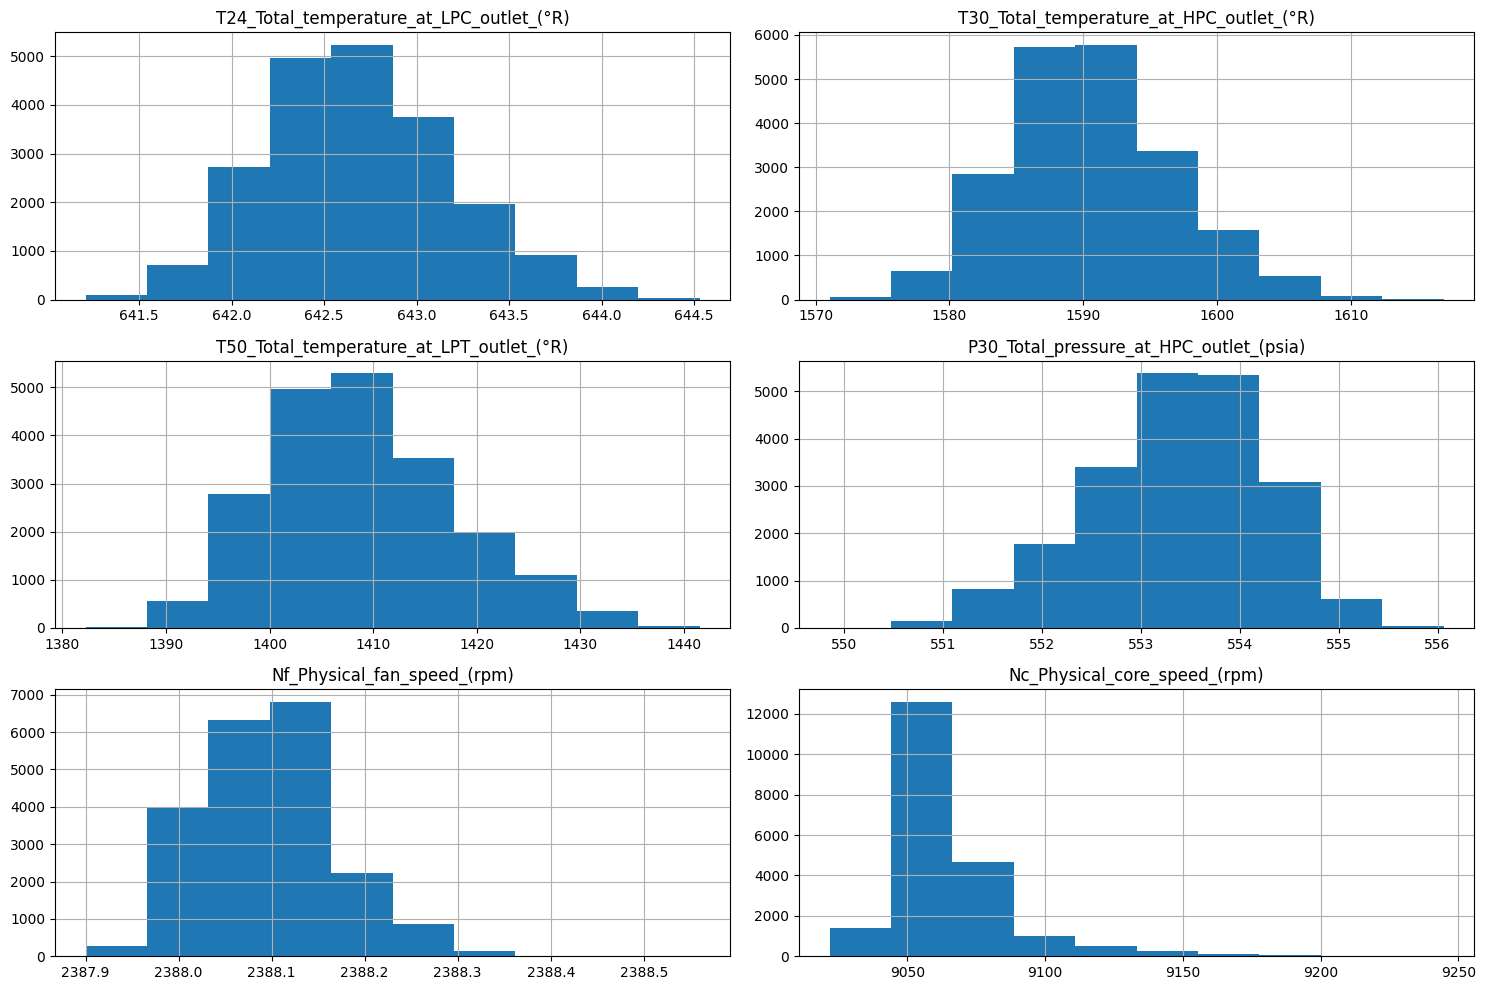

In [11]:
sensors_to_plot = [
    'T24_Total_temperature_at_LPC_outlet_(°R)',
    'T30_Total_temperature_at_HPC_outlet_(°R)',
    'T50_Total_temperature_at_LPT_outlet_(°R)',
    'P30_Total_pressure_at_HPC_outlet_(psia)',
    'Nf_Physical_fan_speed_(rpm)',
    'Nc_Physical_core_speed_(rpm)'
]

train_df[sensors_to_plot].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [14]:
features = [
    'T24_Total_temperature_at_LPC_outlet_(°R)',
    'T30_Total_temperature_at_HPC_outlet_(°R)',
    'T50_Total_temperature_at_LPT_outlet_(°R)',
    'P30_Total_pressure_at_HPC_outlet_(psia)',
    'Nf_Physical_fan_speed_(rpm)',
    'Nc_Physical_core_speed_(rpm)'
]
target = 'RUL'

print(train_df[features + [target]].isnull().sum())

T24_Total_temperature_at_LPC_outlet_(°R)    0
T30_Total_temperature_at_HPC_outlet_(°R)    0
T50_Total_temperature_at_LPT_outlet_(°R)    0
P30_Total_pressure_at_HPC_outlet_(psia)     0
Nf_Physical_fan_speed_(rpm)                 0
Nc_Physical_core_speed_(rpm)                0
RUL                                         0
dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X = scaler.fit_transform(train_df[features])
y = train_df[target]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)


In [19]:
print(f"Training MSE: {train_mse}, Training R2: {train_r2}")
print(f"Validation MSE: {val_mse}, Validation R2: {val_r2}")

Training MSE: 2098.4492418716104, Training R2: 0.5617232733557265
Validation MSE: 2071.263176038774, Validation R2: 0.546650020515625


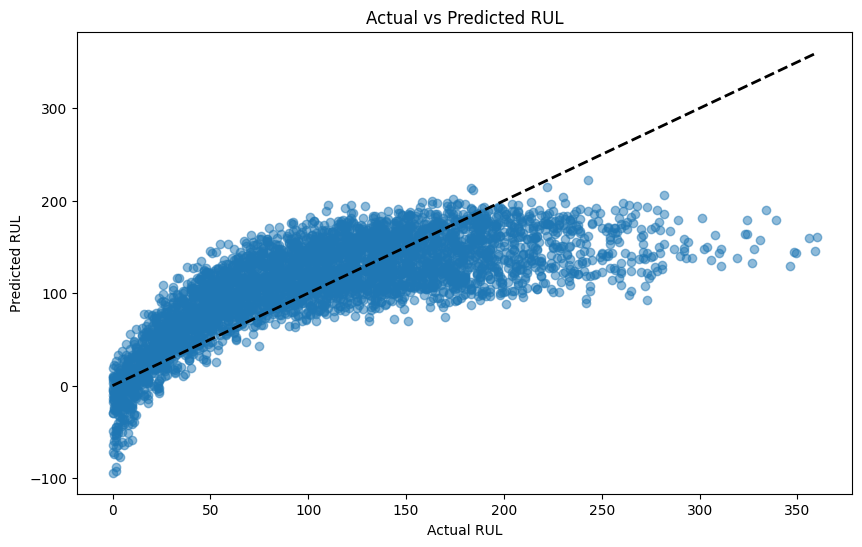

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()